## scikit-learn 付属の手書き数字サンプルを使って識別実験をしてみよう

参考 URL

- [Recognizing hand-written digits](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

- [いまさら聞けない？scikit-learnのキホン](http://dev.classmethod.jp/machine-learning/introduction-scikit-learn/)

- [scikit-learnを使ってみた](http://labs.septeni.co.jp/entry/2017/07/10/145448)

In [25]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## データの読み込み

In [28]:
data, labels = datasets.load_digits(return_X_y=True)  # 数字データの読み込み

# 50:50
データのうち５０％を訓練用、残り５０％をテスト用として学習器の汎化能力を検証する

In [30]:
from sklearn import linear_model
clf = linear_model.LogisticRegression() # 識別器を作成

In [33]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=10,     # 分割を10個生成
                  train_size=0.5,  # 学習は半分
                  test_size =0.5,  # テストも半分
                  random_state=0)  # 乱数種（再現用）

scores = []
for train_index, test_index in ss.split(data): # 学習データとテストデータのインデックスを作成
    
    X_train, X_test = data[train_index], data[test_index] # 学習データ，テストデータ
    y_train, y_test = labels[train_index], labels[test_index] # 学習データのラベル，テストデータのラベル

    clf.fit(X_train, y_train)         # 識別器の学習
    score = clf.score(X_test, y_test) # テストデータの精度
    scores.append(score)

scores = np.array(scores)
print(scores)

[ 0.94438265  0.95328142  0.95216908  0.94771969  0.94438265  0.95995551
  0.96106785  0.94104561  0.95661846  0.95439377]


In [34]:
scores.mean(),scores.std()

(0.95150166852057849, 0.0065278757513331257)

In [35]:
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

95.15 +/- 0.65 %


# 誤認識データの確認

In [48]:
ss = ShuffleSplit(n_splits=1,     # 分割を10個生成
                  train_size=0.5,  # 学習は半分
                  test_size =0.5,  # テストも半分
                  random_state=0)  # 乱数種（再現用）
train_index, test_index = next(ss.split(data))
X_train, X_test = data[train_index], data[test_index] # 学習データ，テストデータ
y_train, y_test = labels[train_index], labels[test_index] # 学習データのラベル，テストデータのラベル
clf.fit(X_train, y_train)         # 識別器の学習
score = clf.score(X_test, y_test) # テストデータの精度
print(score)

0.944382647386


In [54]:
# 先頭から10個の識別器の出力
clf.predict(data[:10])

array([0, 1, 2, 3, 4, 9, 6, 7, 8, 9])

# 誤認識の位置

In [57]:
np.where(clf.predict(data)!=labels)

(array([   5,   18,   19,   37,   75,   77,  170,  191,  206,  378,  461,
         473,  500,  519,  524,  578,  648,  658,  670,  746,  769,  784,
         792,  794,  899,  930, 1018, 1125, 1186, 1203, 1256, 1264, 1280,
        1361, 1443, 1522, 1551, 1553, 1571, 1575, 1582, 1583, 1595, 1611,
        1658, 1662, 1664, 1690, 1726, 1727, 1741]),)

# 誤認識データを画像として確認

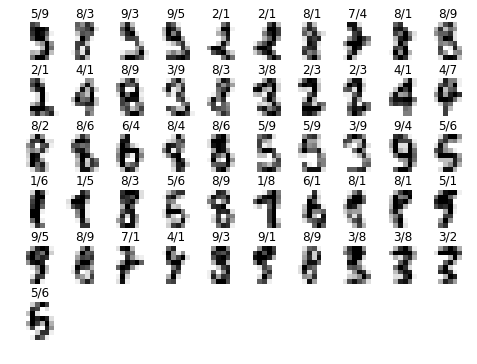

In [68]:
err_index = np.where(clf.predict(data)!=labels)[0]
err_num = len(err_index)
images_labels_predicts = list(zip(digits.images[err_index], digits.target[err_index],clf.predict(data[err_index])))

plt.figure(figsize=(8,6))
for index, (image, label, predict) in enumerate(images_labels_predicts):
    plt.subplot(len(err_index-1)//10+1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('{}/{}'.format(label,predict))
plt.show();

# 分割比と認識率の関係

In [70]:
# 学習データの分量を0.1, 0.2, ..., 0.9に
train_sizes = np.arange(0.1, 1.0, 0.1)

In [71]:
all_mean = []
all_std  = []

for train_size in train_sizes:

    ss = ShuffleSplit(n_splits=100,
                      train_size=train_size,
                      test_size=1-train_size)

    scores = []
    for train_index, test_index in ss.split(data):

        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)

    scores = np.array(scores)
    print("train_size {0:.0f}%: {1:4.2f} +/- {2:4.2f} %".format(train_size    * 100, 
                                                                scores.mean() * 100, 
                                                                scores.std()  * 100))
    all_mean.append(scores.mean() * 100)
    all_std.append(scores.std() * 100)

train_size 10%: 90.93 +/- 0.94 %
train_size 20%: 93.00 +/- 0.79 %
train_size 30%: 93.91 +/- 0.64 %
train_size 40%: 94.63 +/- 0.66 %
train_size 50%: 95.17 +/- 0.64 %
train_size 60%: 95.43 +/- 0.69 %
train_size 70%: 95.72 +/- 0.70 %
train_size 80%: 96.06 +/- 1.03 %
train_size 90%: 95.99 +/- 1.38 %


In [72]:
# matplotlibの準備
import matplotlib.pyplot as plt
%matplotlib inline

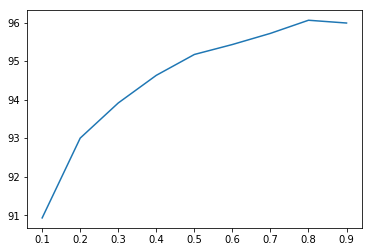

In [73]:
plt.plot(train_sizes, all_mean)

(0, 1)

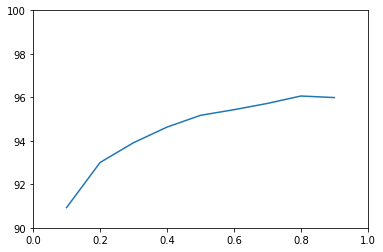

In [74]:
plt.plot(train_sizes, all_mean)
plt.ylim(90,100)
plt.xlim(0,1)

Text(0.5,1,'Average of 10 hold-out tests for different training size')

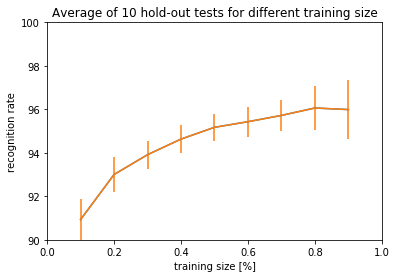

In [75]:
plt.plot(train_sizes, all_mean)
plt.ylim(90,100)
plt.xlim(0,1)
plt.errorbar(train_sizes, all_mean, yerr=all_std)
plt.xlabel("training size [%]")
plt.ylabel("recognition rate")
plt.title("Average of 10 hold-out tests for different training size")

In [76]:
stratifiedshufflesplit

NameError: name 'stratifiedshufflesplit' is not defined